# Analyzing background data
This file is for analyzing the background data:
- app names
- requested permissions 
- granted permissions
- app type (user or system)
- target SDK
- usage time (optional-not all participants)
<div class="alert alert-block alert-warning">**In the DB connection (first cell) specifiy the path for your LOCAL file with two lines , first line for user name, and second line for password.** </div>

In [54]:
#data base connection
import csv
import pandas
from sshtunnel import SSHTunnelForwarder
import pymysql

#specifiy the path for your file
with open('/Users/QN/Desktop/THIRD crowdperm/user.txt') as f:
    lines = f.read().splitlines()    
f.close()


server =    SSHTunnelForwarder(
         ('juhu.soic.indiana.edu'),
         ssh_username=lines[0],
         ssh_password=lines[1],
         remote_bind_address=('127.0.0.1', 3306))
server.start()
cnx = pymysql.connect(host='127.0.0.1',
                           port=server.local_bind_port,
                           user='mturk',
                           passwd='m+turk=my-sql',
                           db='mturk')
cnx.set_charset('utf8')  
cursor = cnx.cursor()

#### Do users tend to allow specific permissions to apps more than others (find patterns)? (background data)

from Kruskal wallis result, we can see that there is a statitciaccky significant difference


In [85]:
#prepare fraction of allowed permission data


query = ("select * from permissions")

cursor.execute(query)


#for (x) in cursor:
  #print("{}".format(x))

requestedPerm = {'MICROPHONE':0,'LOCATION':0,'CAMERA':0,'CONTACTS':0,'PHONE':0,'STORAGE':0,'CALENDAR':0,'SENSORS':0,'SMS':0}
grantedPerm = {'MICROPHONE':0,'LOCATION':0,'CAMERA':0,'CONTACTS':0,'PHONE':0,'STORAGE':0,'CALENDAR':0,'SENSORS':0,'SMS':0}
fraction={'MICROPHONE':0.0,'LOCATION':0.0,'CAMERA':0.0,'CONTACTS':0.0,'PHONE':0.0,'STORAGE':0.0,'CALENDAR':0.0,'SENSORS':0.0,'SMS':0.0}

with open('permissionFractions_out.csv','w') as out:
    #myFields = ['TurkerID', 'number of permissions requested for microphone', 'number of permissions requested for location', 'number of permissions requested for camera', 'number of permissions requested for contacts', 'number of permissions requested for phone', 'number of permissions requested for storage', 'number of permissions requested for calendar','number of permissions requested sensor','number of permissions requested sms','number of permissions granted for microphone', 'number of permissions granted for location', 'number of permissions granted for camera', 'number of permissions granted for contacts', 'number of permissions granted for phone', 'number of permissions granted for storage', 'number of permissions granted for calendar','number of permissions granted sensor','number of permissions granted sms','danger level of microphone','danger level of location','danger level of camera','danger level of contacts','danger level of phone','danger level of storage','danger level of calendar','danger level of sensor','danger level of sms']
   # myFields = ['TurkerID', 'number of apps requested microphone', 'number of apps requested location', 'number of apps requested camera', 'number of apps requested contacts', 'number of apps requested phone', 'number of apps requested storage', 'number of apps requested calendar','number of apps requested sensor','number of apps requested sms','number of apps granted microphone', 'number of apps granted location', 'number of apps granted camera', 'number of apps granted contacts', 'number of apps granted phone', 'number of apps granted storage', 'number of apps granted calendar','number of apps granted sensor','number of apps granted sms']
    myFields = ['TurkerID', 'number of apps requested microphone', 'number of apps requested location', 'number of apps requested camera', 'number of apps requested contacts', 'number of apps requested phone', 'number of apps requested storage', 'number of apps requested calendar','number of apps requested sensor','number of apps requested sms','number of apps granted microphone', 'number of apps granted location', 'number of apps granted camera', 'number of apps granted contacts', 'number of apps granted phone', 'number of apps granted storage', 'number of apps granted calendar','number of apps granted sensor','number of apps granted sms','fraction of apps granted microphone', 'fraction of apps granted location', 'fraction of apps granted camera', 'fraction of apps granted contacts', 'fraction of apps granted phone', 'fraction of apps granted storage', 'fraction of apps granted calendar','fraction of apps granted sensor','fraction of apps granted sms']
    writer = csv.DictWriter(out, fieldnames=myFields)
    writer.writeheader()
    prevTurk = 'nonsense'
    check = -1
    for row in cursor:
        if row[1] != prevTurk:
                if check != -1:
                    #writer.writerow({'TurkerID':prevTurk,'number of permissions requested for microphone':requestedPerm['MICROPHONE'], 'number of permissions requested for location':requestedPerm['LOCATION'], 'number of permissions requested for camera':requestedPerm['CAMERA'], 'number of permissions requested for contacts':requestedPerm['CONTACTS'], 'number of permissions requested for phone':requestedPerm['PHONE'], 'number of permissions requested for storage':requestedPerm['STORAGE'], 'number of permissions requested for calendar':requestedPerm['CALENDAR'],'number of permissions requested sensor':requestedPerm['SENSORS'],'number of permissions requested sms':requestedPerm['SMS'],'number of permissions granted for microphone':grantedPerm['MICROPHONE'], 'number of permissions granted for location':grantedPerm['LOCATION'], 'number of permissions granted for camera':grantedPerm['CAMERA'], 'number of permissions granted for contacts':grantedPerm['CONTACTS'], 'number of permissions granted for phone':grantedPerm['PHONE'], 'number of permissions granted for storage':grantedPerm['STORAGE'], 'number of permissions granted for calendar':grantedPerm['CALENDAR'],'number of permissions granted sensor':grantedPerm['SENSORS'],'number of permissions granted sms':grantedPerm['SMS'],'danger level of microphone':danger[0],'danger level of location':danger[1],'danger level of camera':danger[2],'danger level of contacts':danger[3],'danger level of phone':danger[4],'danger level of storage':danger[5],'danger level of calendar':danger[6],'danger level of sensor':danger[7],'danger level of sms':danger[8]})
                    #writer.writerow({'TurkerID':prevTurk,'number of apps requested microphone':requestedPerm['MICROPHONE'], 'number of apps requested location':requestedPerm['LOCATION'], 'number of apps requested camera':requestedPerm['CAMERA'], 'number of apps requested contacts':requestedPerm['CONTACTS'], 'number of apps requested phone':requestedPerm['PHONE'], 'number of apps requested storage':requestedPerm['STORAGE'], 'number of apps requested calendar':requestedPerm['CALENDAR'],'number of apps requested sensor':requestedPerm['SENSORS'],'number of apps requested sms':requestedPerm['SMS'],'number of apps granted microphone':grantedPerm['MICROPHONE'], 'number of apps granted location':grantedPerm['LOCATION'], 'number of apps granted camera':grantedPerm['CAMERA'], 'number of apps granted contacts':grantedPerm['CONTACTS'], 'number of apps granted phone':grantedPerm['PHONE'], 'number of apps granted storage':grantedPerm['STORAGE'], 'number of apps granted calendar':grantedPerm['CALENDAR'],'number of apps granted sensor':grantedPerm['SENSORS'],'number of apps granted sms':grantedPerm['SMS'],'danger level of microphone':danger[0],'danger level of location':danger[1],'danger level of camera':danger[2],'danger level of contacts':danger[3],'danger level of phone':danger[4],'danger level of storage':danger[5],'danger level of calendar':danger[6],'danger level of sensor':danger[7],'danger level of sms':danger[8]})
                    #writer.writerow({'TurkerID':prevTurk,'number of apps requested microphone':requestedPerm['MICROPHONE'], 'number of apps requested location':requestedPerm['LOCATION'], 'number of apps requested camera':requestedPerm['CAMERA'], 'number of apps requested contacts':requestedPerm['CONTACTS'], 'number of apps requested phone':requestedPerm['PHONE'], 'number of apps requested storage':requestedPerm['STORAGE'], 'number of apps requested calendar':requestedPerm['CALENDAR'],'number of apps requested sensor':requestedPerm['SENSORS'],'number of apps requested sms':requestedPerm['SMS'],'number of apps granted microphone':grantedPerm['MICROPHONE'], 'number of apps granted location':grantedPerm['LOCATION'], 'number of apps granted camera':grantedPerm['CAMERA'], 'number of apps granted contacts':grantedPerm['CONTACTS'], 'number of apps granted phone':grantedPerm['PHONE'], 'number of apps granted storage':grantedPerm['STORAGE'], 'number of apps granted calendar':grantedPerm['CALENDAR'],'number of apps granted sensor':grantedPerm['SENSORS'],'number of apps granted sms':grantedPerm['SMS']})
                    if requestedPerm['MICROPHONE']!=0:
                        fraction['MICROPHONE']= grantedPerm['MICROPHONE']/requestedPerm['MICROPHONE']                
                    else:
                        fraction['MICROPHONE']=0
                    
                    if requestedPerm['LOCATION']!=0:
                        fraction['LOCATION']= grantedPerm['LOCATION']/requestedPerm['LOCATION']                
                    else:
                        fraction['LOCATION']=0
                    
                    if requestedPerm['CAMERA']!=0:
                        fraction['CAMERA']= grantedPerm['CAMERA']/requestedPerm['CAMERA']                
                    else:
                        fraction['CAMERA']=0
                     
                    if requestedPerm['CONTACTS']!=0:
                        fraction['CONTACTS']= grantedPerm['CONTACTS']/requestedPerm['CONTACTS']                
                    else:
                        fraction['CONTACTS']=0
                     
                    if requestedPerm['PHONE']!=0:
                        fraction['PHONE']= grantedPerm['PHONE']/requestedPerm['PHONE']                
                    else:
                        fraction['PHONE']=0
                      
                    if requestedPerm['CALENDAR']!=0:
                        fraction['CALENDAR']= grantedPerm['CALENDAR']/requestedPerm['CALENDAR']                
                    else:
                        fraction['CALENDAR']=0
                    
                    if requestedPerm['SENSORS']!=0:
                        fraction['SENSORS']= grantedPerm['SENSORS']/requestedPerm['SENSORS']                
                    else:
                        fraction['SENSORS']=0
                    
                    if requestedPerm['SMS']!=0:
                        fraction['SMS']= grantedPerm['SMS']/requestedPerm['SMS']                
                    else:
                        fraction['SMS']=0
                   
                    if requestedPerm['STORAGE']!=0:
                        fraction['STORAGE']= grantedPerm['STORAGE']/requestedPerm['STORAGE']                
                    else:
                        fraction['STORAGE']=0
                    
                    writer.writerow({'TurkerID':prevTurk,'number of apps requested microphone':requestedPerm['MICROPHONE'], 'number of apps requested location':requestedPerm['LOCATION'], 'number of apps requested camera':requestedPerm['CAMERA'], 'number of apps requested contacts':requestedPerm['CONTACTS'], 'number of apps requested phone':requestedPerm['PHONE'], 'number of apps requested storage':requestedPerm['STORAGE'], 'number of apps requested calendar':requestedPerm['CALENDAR'],'number of apps requested sensor':requestedPerm['SENSORS'],'number of apps requested sms':requestedPerm['SMS'],'number of apps granted microphone':grantedPerm['MICROPHONE'], 'number of apps granted location':grantedPerm['LOCATION'], 'number of apps granted camera':grantedPerm['CAMERA'], 'number of apps granted contacts':grantedPerm['CONTACTS'], 'number of apps granted phone':grantedPerm['PHONE'], 'number of apps granted storage':grantedPerm['STORAGE'], 'number of apps granted calendar':grantedPerm['CALENDAR'],'number of apps granted sensor':grantedPerm['SENSORS'],'number of apps granted sms':grantedPerm['SMS'],'fraction of apps granted microphone':fraction['MICROPHONE'], 'fraction of apps granted location':fraction['LOCATION'], 'fraction of apps granted camera':fraction['CAMERA'], 'fraction of apps granted contacts':fraction['CONTACTS'], 'fraction of apps granted phone':fraction['PHONE'], 'fraction of apps granted storage':fraction['STORAGE'], 'fraction of apps granted calendar':fraction['CALENDAR'],'fraction of apps granted sensor':fraction['SENSORS'],'fraction of apps granted sms':fraction['SMS']})
                    prevTurk = row[1]
                    
                    #re-initialize
                    requestedPerm = {'MICROPHONE':0,'LOCATION':0,'CAMERA':0,'CONTACTS':0,'PHONE':0,'STORAGE':0,'CALENDAR':0,'SENSORS':0,'SMS':0}
                    grantedPerm = {'MICROPHONE':0,'LOCATION':0,'CAMERA':0,'CONTACTS':0,'PHONE':0,'STORAGE':0,'CALENDAR':0,'SENSORS':0,'SMS':0}
                    fraction={'MICROPHONE':0.0,'LOCATION':0.0,'CAMERA':0.0,'CONTACTS':0.0,'PHONE':0.0,'STORAGE':0.0,'CALENDAR':0.0,'SENSORS':0.0,'SMS':0.0}

                else:
                    check = 1
                    prevTurk = row[1]
    
    
        
        rPerm = row[6].strip('[]')
        gPerm = row[7].strip('[]')
            
        rrPerm = rPerm.split(',')
        ggPerm = gPerm.split(',')
            
        for x in rrPerm:
            x = x.strip()
            if x != '':
                requestedPerm[x] = requestedPerm[x] + 1
        for y in ggPerm:
            y = y.strip()
            if y != '':
                grantedPerm[y] = grantedPerm[y] + 1
        
        #danger = row[8].split(',')
        


dfPermissions = pandas.read_csv('permissionFractions_out.csv',sep=',')
dfPermissions=dfPermissions[dfPermissions['number of apps requested location']>5]
dfPermissions=dfPermissions[dfPermissions['number of apps requested contacts']>5]
dfPermissions=dfPermissions[dfPermissions['number of apps requested camera']>5]
dfPermissions=dfPermissions[dfPermissions['number of apps requested sms']>5]
dfPermissions=dfPermissions[dfPermissions['number of apps requested phone']>5]
dfPermissions=dfPermissions[dfPermissions['number of apps requested storage']>5]
dfPermissions=dfPermissions[dfPermissions['number of apps requested calendar']>5]
dfPermissions=dfPermissions[dfPermissions['number of apps requested microphone']>5]


#geta slice of the data frame for plotting
dfFractions=dfPermissions.loc[:, 'fraction of apps granted microphone':'fraction of apps granted sms']

#dfPermissions=dfPermissions[dfPermissions['number of apps requested sensor']>5]
########FILTER for >5 apps requesting the permission
########skip the ones with -1 value
########try kruskal wallis
import scipy.stats as stats
#ANOVA
#stats.f_oneway(meanMic, meanLocation, meanCamera, meanContacts, meanStorage, meanPhone)

#Kruskal-Wallis
#stats.kruskal(meanMic, meanLocation, meanCamera, meanContacts, meanStorage, meanPhone)
#stats.kruskal(dfPermissions['fraction of apps granted microphone'], dfPermissions['fraction of apps granted location'],dfPermissions['fraction of apps granted camera'], dfPermissions['fraction of apps granted contacts'],dfPermissions['fraction of apps granted phone'],dfPermissions['fraction of apps granted storage'],dfPermissions['fraction of apps granted calendar'],dfPermissions['fraction of apps granted sms'])
stats.f_oneway(dfPermissions['fraction of apps granted microphone'], dfPermissions['fraction of apps granted location'],dfPermissions['fraction of apps granted camera'], dfPermissions['fraction of apps granted contacts'],dfPermissions['fraction of apps granted phone'],dfPermissions['fraction of apps granted storage'],dfPermissions['fraction of apps granted calendar'],dfPermissions['fraction of apps granted sms'])

#calcuate the fraction of allowed permission for each permission (one point for each user)
#dfPermissions.head()        
#cursor.close()
#cnx.close()

F_onewayResult(statistic=22.259114998102163, pvalue=2.8028626389457957e-29)

The least granted permission is the contacts
The most granted one is the storage and location

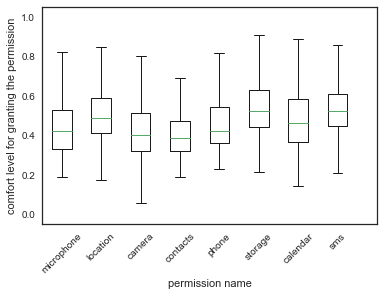

In [56]:
#plot the data:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib import pyplot as plt
#fractionPermissions=[dfPermissions['fraction of apps granted microphone'], dfPermissions['fraction of apps granted location'],dfPermissions['fraction of apps granted camera'], dfPermissions['fraction of apps granted contacts'], dfPermissions['fraction of apps granted phone'], dfPermissions['fraction of apps granted storage'],dfPermissions['fraction of apps granted calendar'],dfPermissions['fraction of apps granted sensor'],dfPermissions['fraction of apps granted sms']
#fractionPermissions=[dfPermissions['fraction of apps granted microphone'], dfPermissions['fraction of apps granted location'],dfPermissions['fraction of apps granted camera'], dfPermissions['fraction of apps granted contacts'],dfPermissions['fraction of apps granted phone'],dfPermissions['fraction of apps granted storage'],dfPermissions['fraction of apps granted calendar'],dfPermissions['fraction of apps granted sensor'],dfPermissions['fraction of apps granted sms']]
fractionPermissions=[dfPermissions['fraction of apps granted microphone'], dfPermissions['fraction of apps granted location'],dfPermissions['fraction of apps granted camera'], dfPermissions['fraction of apps granted contacts'],dfPermissions['fraction of apps granted phone'],dfPermissions['fraction of apps granted storage'],dfPermissions['fraction of apps granted calendar'],dfPermissions['fraction of apps granted sms']]

plt.boxplot(fractionPermissions)
#plt.xticks([1, 2, 3,4,5,6,7,8,9],['microphone','location','camera','contacts','phone','storage','calendar','sensor','sms'])
plt.xticks([1, 2, 3,4,5,6,7,8,9],['microphone','location','camera','contacts','phone','storage','calendar','sms'])
plt.xticks(rotation=45)
plt.xlabel('permission name')
plt.ylabel('comfort level for granting the permission')
#plt.plot(meanLocation, label='Location')
#plt.legend()
plt.show()

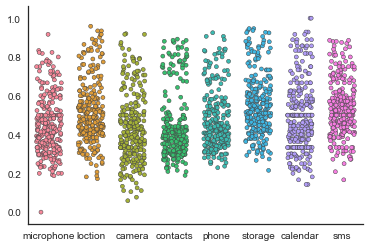

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
#np.array(fractionPermissions)#geta slice of the data frame for plotting
dfFractions=dfPermissions.loc[:, 'fraction of apps granted microphone':'fraction of apps granted sms']
dfFractions.columns = ['microphone', 'loction', 'camera','contacts','phone','storage','calendar','sensor','sms']
#remove sensors
dfFractions=dfFractions.drop(['sensor'], axis=1)
#dfFractions
#iris = sns.load_dataset('iris')
sns.stripplot(data=dfFractions, jitter=0.3,size=4,linewidth=0.5)
sns.despine()

### Usage time analysis:

test the hypothesis "Most frequently used apps are less restricted"
In other words: the higher the usage time, the higher the number of granted permissions"



In [2]:
#prepare usage time data


query = ("select a.* , b.`usagetime` from permissions a , usageTime b where a.`TurkerID`=b.`TurkerID` and a.`appName`=b.`appName` order by b.TurkerID, b.usageTime")

cursor.execute(query)

with open('out.csv','w') as out:
    myFields = ['TurkerID', 'randomint', 'appName', 'appType', 'targetSDK', 'requestedPerms', 'grantedPerms', 'usagetime','number of permissions requested','number of permissions granted']
    writer = csv.DictWriter(out, fieldnames=myFields)
    writer.writeheader()
    for row in cursor:
        rPerm = row[6].strip('[]')
        gPerm = row[7].strip('[]')
        writer.writerow({'TurkerID':row[1], 'randomint':row[2], 'appName':row[3], 'appType':row[4], 'targetSDK':row[5], 'requestedPerms':row[6], 'grantedPerms':row[7], 'usagetime':row[8],'number of permissions requested':len(rPerm.split()),'number of permissions granted':len(gPerm.split())})



        
        
dfUsage = pandas.read_csv('out.csv',sep=',')
        
cursor.close()
#cnx.close()

In [3]:
dfUsage.head()

,TurkerID,randomint,appName,appType,targetSDK,requestedPerms,grantedPerms,usagetime,number of permissions requested,number of permissions granted
0,A002160837SWJFPIAI7L,87492,My Files,system,24,[STORAGE],[STORAGE],1,1,1
1,A002160837SWJFPIAI7L,87492,Apps Survey,user,23,[],[],2,0,0
2,A002160837SWJFPIAI7L,87492,Google Play Music,system,26,"[LOCATION, STORAGE, CONTACTS]",[STORAGE],3,3,1
3,A002160837SWJFPIAI7L,87492,Amazon Kindle,system,24,"[STORAGE, CONTACTS, PHONE]",[],5,3,0
4,A002160837SWJFPIAI7L,87492,UberEATS,user,25,"[LOCATION, PHONE, CAMERA, STORAGE, CONTACTS, SMS]",[LOCATION],7,6,1


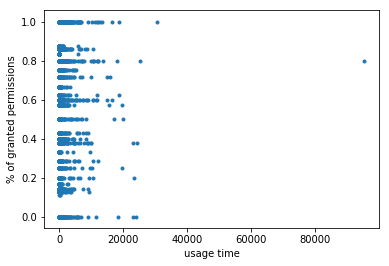

In [4]:
#test the hypothesis "Most frequently used apps are less restricted"
#In other words: the higher the usage time, the higher the number of granted permissions"
#stat analysis
from scipy import stats
from pydoc import help
from scipy.stats.stats import pearsonr
from scipy.stats.stats import spearmanr
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
#help(pearsonr)

#read usage time file into a dataframe
usagedata=dfUsage

#try again with another filter
#skip the rows with zero requested permissions
usagedata=usagedata[usagedata['number of permissions requested'] > 4]
x=usagedata['usagetime']
y=usagedata['number of permissions granted']/usagedata['number of permissions requested']
#spearmanr(x,y)
pearsonr(x, y)


#plot the usagetime vs. %of granted permissions
import matplotlib.pyplot as plt
import numpy as np
#x=np.log(x)
plt.scatter(x/60,y,marker='.')
plt.xlabel('usage time')
plt.ylabel('% of granted permissions')
#plt.xscale('log')
#plt.plot(x,y)
#plt.plot(y)
plt.show()

In [8]:
pearsonr(x, y)
#spearmanr(x,y)

SpearmanrResult(correlation=0.083891138494214965, pvalue=3.9409721862268437e-09)

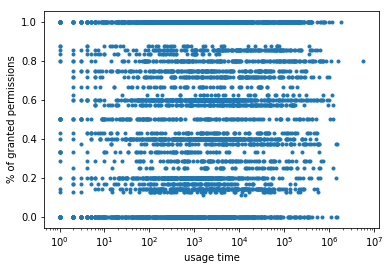

In [6]:
plt.xscale('log')
plt.scatter(x,y,marker='.')
plt.xlabel('usage time')
plt.ylabel('% of granted permissions')
plt.show()

In [7]:
#close DB connection
cnx.close()